# Aticha Amie Prasongsukarn

# Analysis Pipeline
1. Load Data
    * Download file from kaggle.
    * Read csv.file into notebook. 
1. Clean Data
    * Remove columns not being used depending on the research question
    * Remove missing values
1. Process Data
    * Create any new columns needed that are combinations or aggregates of other columns eg. weighted averages.
1. Wrangle Data
    * Merge the datasets together depending on the goal of the research question.
    * Rename/organize columns to make the resulting dataframe clearer
1. Exploratory Data Analysis
    * Create plots to summarize findings
    * Edit the plot components to make it easier to understand
    * Use color to emphasize different components depending on the research question
    

## Research question/interests
**What are the average healthcare costs for different age groups?**
For this question, I plan to calculate the average healthcare cost for each age group and produce a graph where the x-axis is the age group and the y-axis is the amount. The graph will be plotted as a bar chart for each age group side by side.

**How does the number of children affect medical charges?**
I plan to create a joint plot for this question where the axes are number of children against charges. I hope the joint plot will give an output to show the correlation between number of children and medical charges.


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions1
else:
    import sys
    sys.path.append("./code")
    import project_functions1
    
df = project_functions1.load_and_process("../data/raw/medical_expense.csv")
df1 = project_functions1.clean_and_wrangle(df)

### Research Question 1: What are the average healthcare costs for different age groups?

Text(0.5, 1.0, 'Average Healthcare cost for each age')

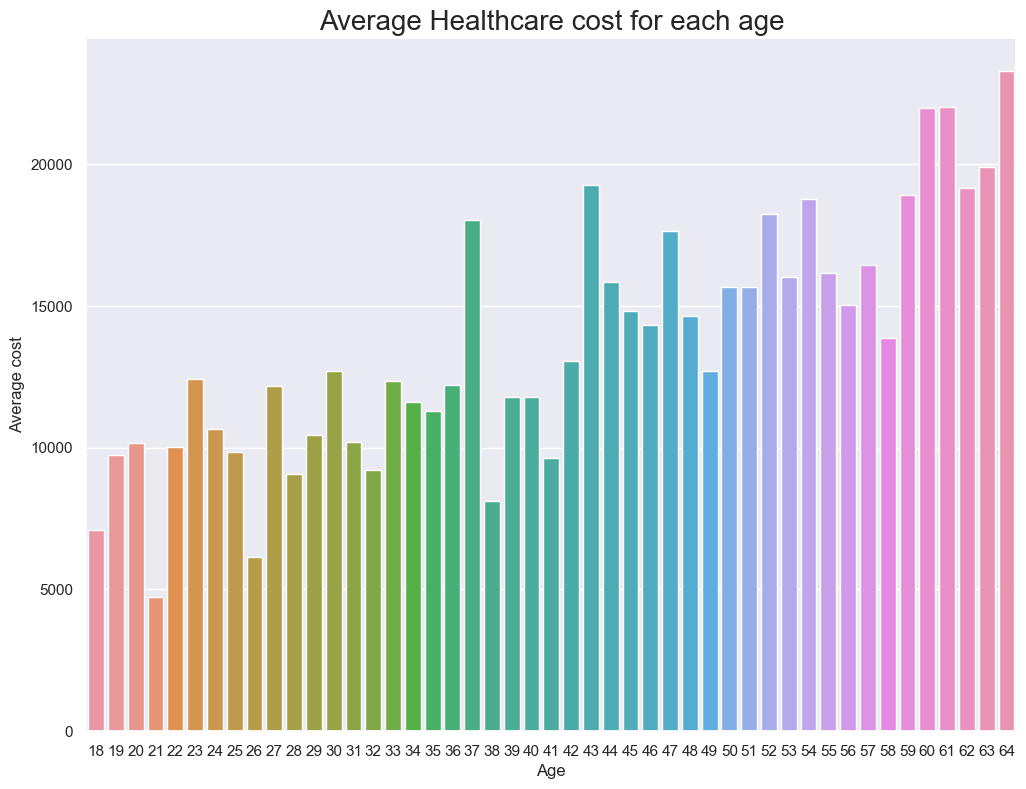

In [70]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.barplot(x = 'Age', y = 'Average cost', data = df1, estimator= np.mean, errorbar=('ci', 85), capsize=.2)
ax.set_title("Average Healthcare cost for each age", size = 20)

Text(0.5, 1.0, 'Average Healthcare cost for each age')

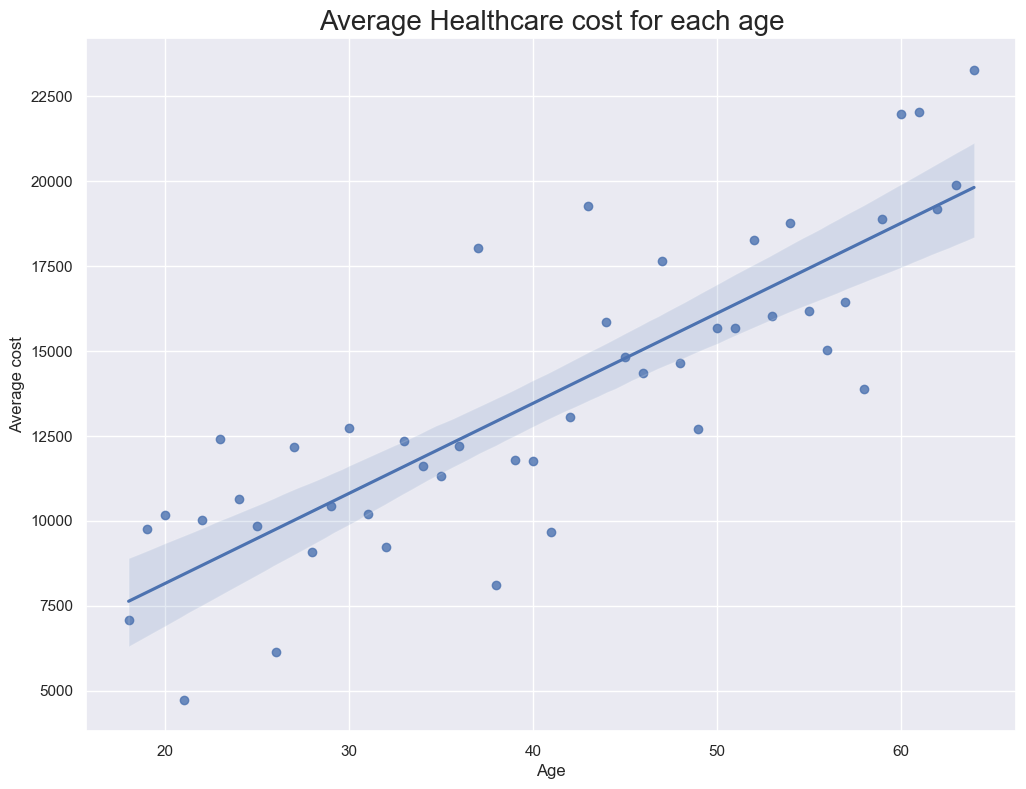

In [6]:
sns.set(rc={'figure.figsize':(12,9)})
plt = sns.regplot(x = 'Age', y = 'Average cost', data = df1)
plt.set_title("Average Healthcare cost for each age", size = 20)

From the plot above, we can see a positive correlation between age and average cost. Though we can see that the points are quite spread out and so creating a weak positive correlation between both factors. As predicted, as we get older, it is possible for the average cost to get higher because older people are prone to more diseases.

### Research Question 2: Does the number of children affect medical charges?

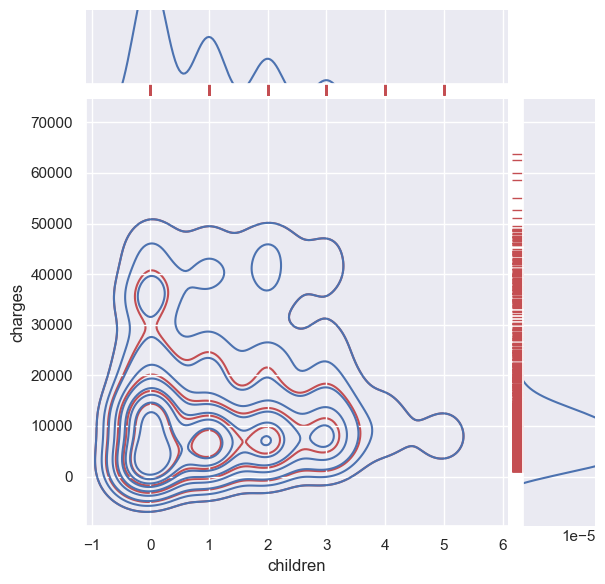

In [71]:
g = sns.jointplot(data=df, x="children", y="charges", kind = "kde")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

From the plot we can see that the data are scrumbled so close together around $10,000 for charges and it is for people with no children. This may be different to our predicition as we would think families with more children will have higher medical charges. However, from this plot the data is showing the opposite.